../data/input/elliptical_1.jpeg
 elliptical confidence = 6 / 6 (100.0)
../data/input/elliptical_2.jpeg
 elliptical confidence = 6 / 6 (100.0)
../data/input/elliptical_3.jpeg
 elliptical confidence = 5 / 6 (83.33333333333334)
../data/input/spiral_1.jpeg
 elliptical confidence = 2 / 6 (33.33333333333333)
../data/input/spiral_2.jpeg
 elliptical confidence = 1 / 6 (16.666666666666664)
../data/input/spiral_3.jpeg
 elliptical confidence = 3 / 6 (50.0)
../data/input/irregular_1.jpeg
 elliptical confidence = 3 / 6 (50.0)
../data/input/irregular_2.jpeg
 elliptical confidence = 2 / 6 (33.33333333333333)
../data/input/irregular_3.jpeg
 elliptical confidence = 1 / 6 (16.666666666666664)


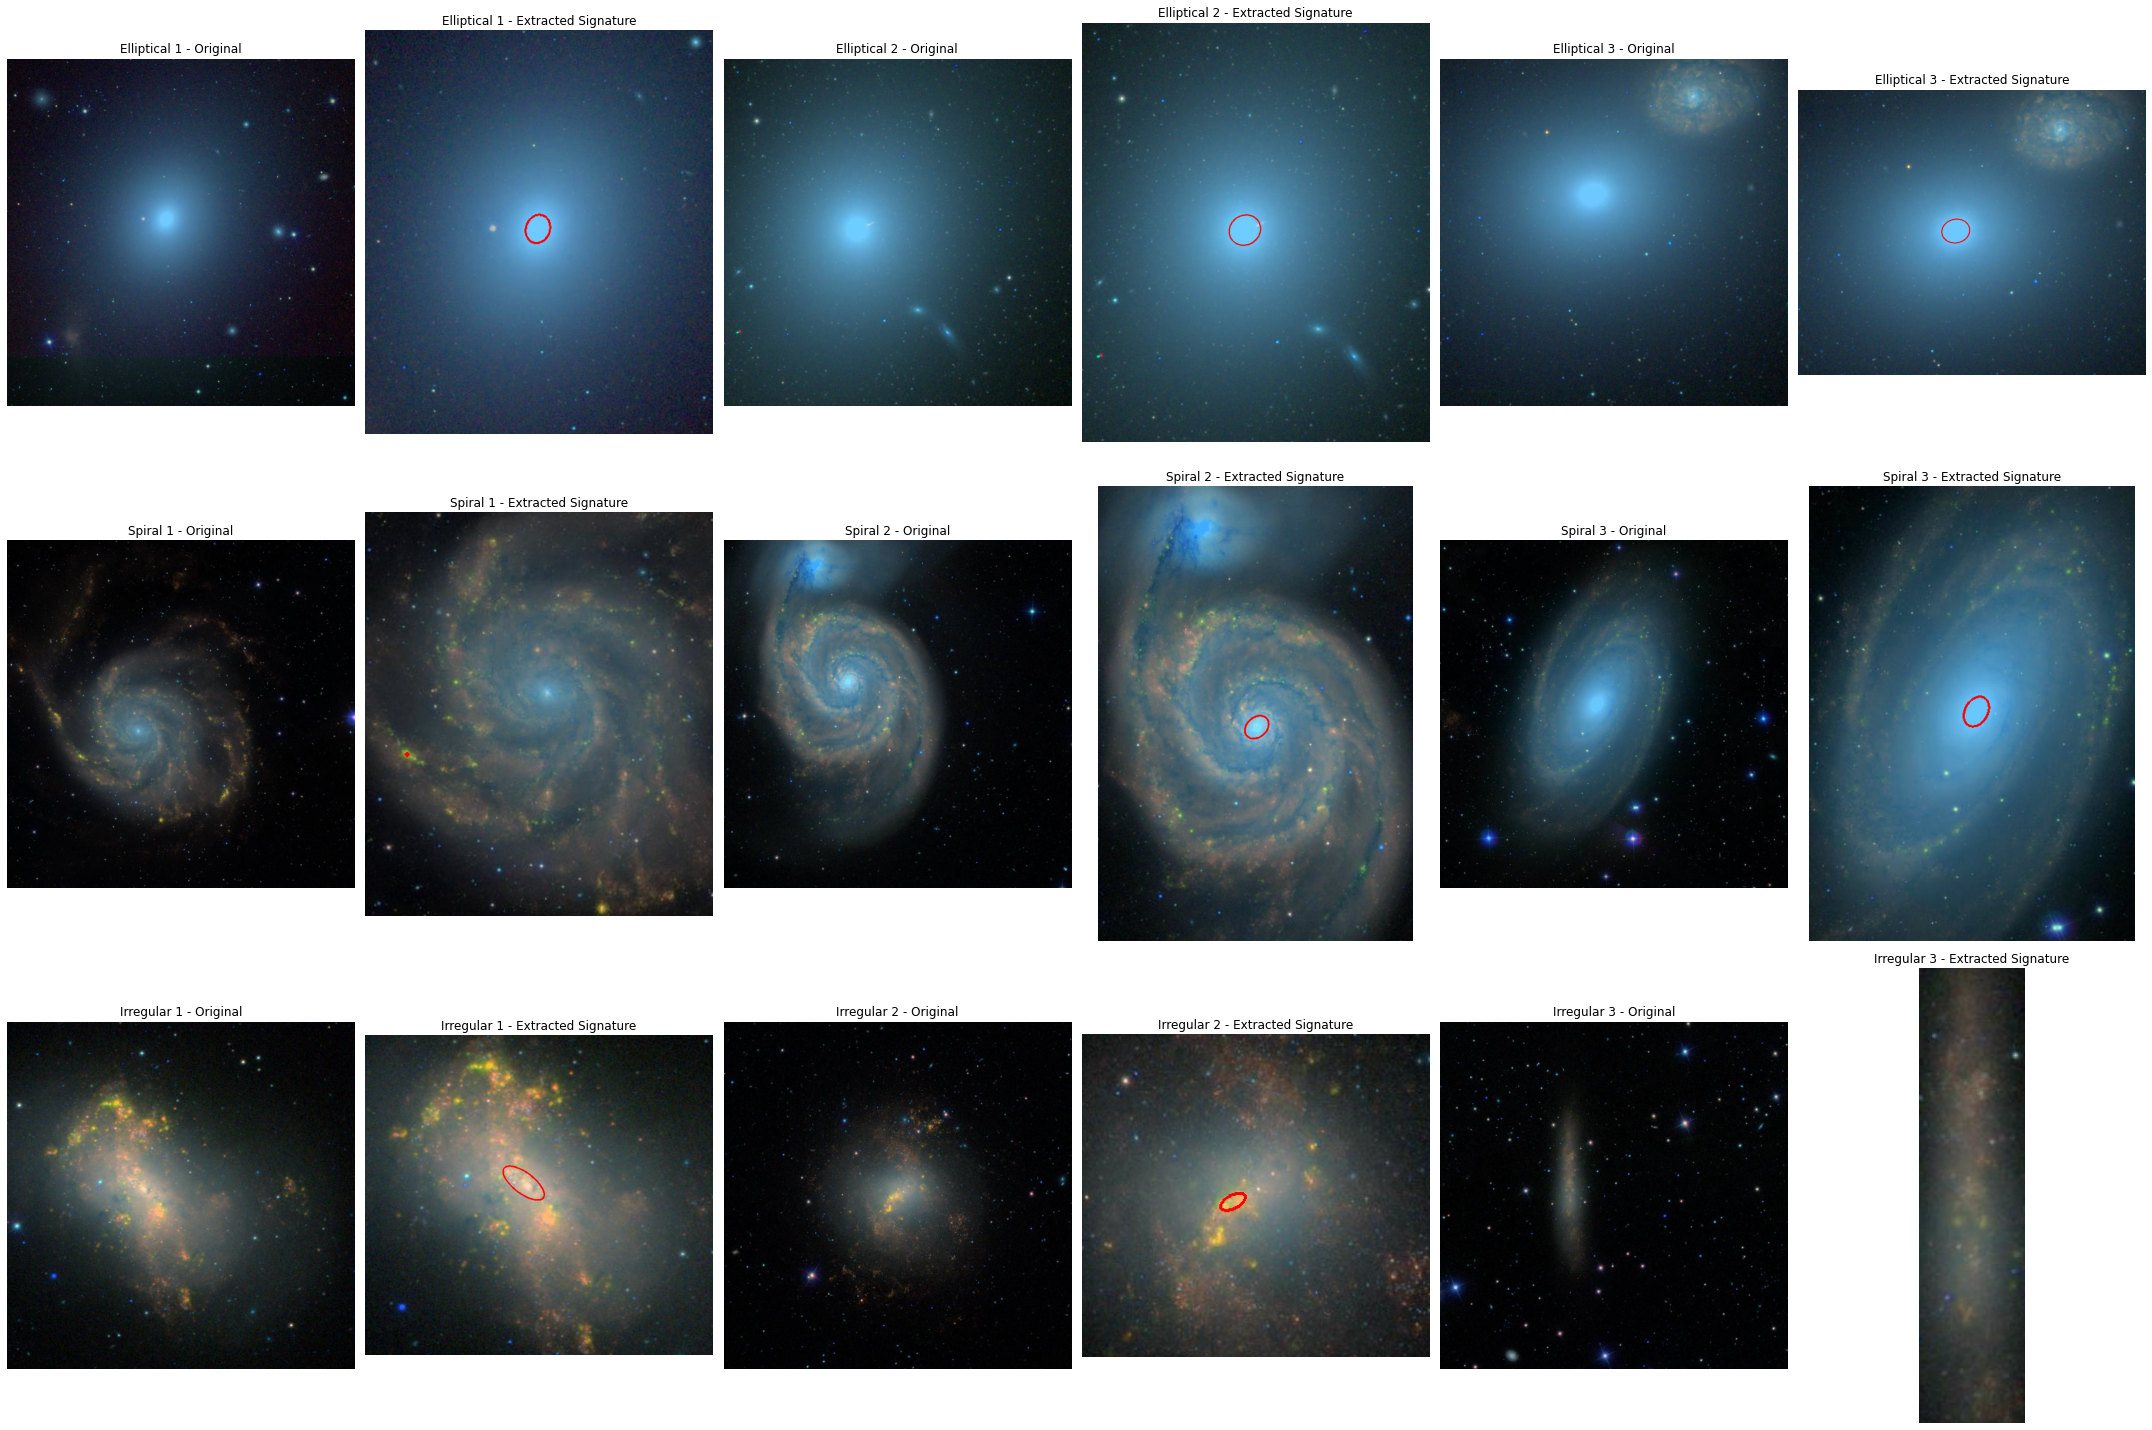

In [1]:
from morphology_detector import GalactiClass_MorphologyDetector
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

classifier = GalactiClass_MorphologyDetector()

image_classes = ['elliptical', 'spiral', 'irregular']
image_files = {cls: [f'../data/input/{cls}_{i}.jpeg' for i in range(1, 4)] for cls in image_classes}

# Create subplots: 3 classes x 3 images per class x 2 (original and extracted) = 18 subplots
fig, axs = plt.subplots(3, 6, figsize=(30, 20))

for i, cls in enumerate(image_classes):
    for j in range(3):
        print(image_files[cls][j])
        # Read original image
        original = cv2.imread(image_files[cls][j], cv2.IMREAD_COLOR)
        original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

        # Process image to get extracted signature
        extracted_signature = classifier.detect_morphology(original)

        # Plot original image
        axs[i, 2*j].imshow(original_rgb)
        axs[i, 2*j].set_title(f"{cls.capitalize()} {j+1} - Original")
        axs[i, 2*j].axis('off')

        # Plot extracted signature
        axs[i, 2*j+1].imshow(extracted_signature)
        axs[i, 2*j+1].set_title(f"{cls.capitalize()} {j+1} - Extracted Signature")
        axs[i, 2*j+1].axis('off')

plt.tight_layout()
plt.show()